In [1]:
import pandas as pd
import datetime
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sn


energy = pd.read_csv(r'C:\Users\derek\Documents\CSE351\HW2\energy_data.csv')
weather = pd.read_csv(r'C:\Users\derek\Documents\CSE351\HW2\weather_data.csv')

weather['time'] = weather['time'].apply(lambda x: pd.to_datetime(x, unit='s'))
# datetime.datetime.fromtimestamp(x)
weather.head()
# weather['time'] = datetime.datetime.fromtimestamp(weather['time'])

,temperature,icon,humidity,visibility,summary,pressure,windSpeed,cloudCover,time,windBearing,precipIntensity,dewPoint,precipProbability
0,34.98,partly-cloudy-night,0.64,10.00,Partly Cloudy,1017.69,7.75,0.29,2014-01-01 00:00:00,279,0.0,23.89,0.0
1,16.49,clear-night,0.62,10.00,Clear,1022.76,2.71,0.06,2014-01-01 01:00:00,195,0.0,5.87,0.0
2,14.63,clear-night,0.68,10.00,Clear,1022.32,4.84,0.03,2014-01-01 02:00:00,222,0.0,6.17,0.0
3,13.31,clear-night,0.71,10.00,Clear,1021.64,4.00,0.14,2014-01-01 03:00:00,209,0.0,5.63,0.0
4,13.57,clear-night,0.71,9.93,Clear,1020.73,3.67,0.04,2014-01-01 04:00:00,217,0.0,5.87,0.0


Imported all necessary packages, began by parsing all time fields of the weather column. All Unix time values (seconds after 01/01/1970) were converted to YYYY-MM-DD HH:MM:SS format. 

In [2]:
energy.tail()

,Date & Time,use [kW],gen [kW],Grid [kW],AC [kW],Furnace [kW],Cellar Lights [kW],Washer [kW],First Floor lights [kW],Utility Rm + Basement Bath [kW],Garage outlets [kW],MBed + KBed outlets [kW],Dryer + egauge [kW],Panel GFI (central vac) [kW],Home Office (R) [kW],Dining room (R) [kW],Microwave (R) [kW],Fridge (R) [kW]
17515,2014-12-31 21:30:00,1.560890,0.0,1.560890,0.003226,0.392996,0.006342,0.000872,0.030453,0.002248,0.004817,0.278941,0.000120,0.000292,0.007983,0.033991,0.003702,0.002906
17516,2014-12-31 22:00:00,0.958447,0.0,0.958447,0.000827,0.027369,0.006326,0.000811,0.030391,0.002543,0.004724,0.243128,0.000139,0.000334,0.006178,0.034535,0.004464,0.113162
17517,2014-12-31 22:30:00,0.834462,0.0,0.834462,0.001438,0.170561,0.020708,0.000636,0.012631,0.002372,0.004711,0.204744,0.000087,0.000341,0.005684,0.034484,0.004502,0.051604
17518,2014-12-31 23:00:00,0.543863,0.0,0.543863,0.001164,0.153533,0.008423,0.000553,0.003832,0.002353,0.004736,0.177276,0.000109,0.000373,0.005160,0.025601,0.004647,0.039409
17519,2014-12-31 23:30:00,0.414441,0.0,0.414441,0.000276,0.009223,0.006619,0.000526,0.003818,0.002424,0.004664,0.154928,0.000190,0.000363,0.005000,0.023976,0.004800,0.117189


In [3]:
energy['Date & Time'] = energy['Date & Time'].apply(lambda x: pd.to_datetime(x))
en = energy.set_index('Date & Time').resample('D').sum()
we = weather.set_index('time').resample('D').mean()
#en.resample('D').sum()
# display(we)

Next, I did the same with the energy dataset's 'Date & Time' Column, converting all cells in the column to a datetime object. Now that the dates in both datasets are represented as datetime objects, we can now set the indices of each data set as the date/time column, resampling the data from half-hourly/hourly intervals to daily intervals. I took the sum when resampling the energy dataset because energy usage is certainly cumulative, but took the mean for the resampling of the weather dataset, because variables like cloud cover and pressure are not cumulative.

In [4]:
list(en)
#en.rename(columns = {'Date & Time':'time'}, inplace = False)
en.head()
# merged = pd.merge(we, en, on='time', how='outer')

,use [kW],gen [kW],Grid [kW],AC [kW],Furnace [kW],Cellar Lights [kW],Washer [kW],First Floor lights [kW],Utility Rm + Basement Bath [kW],Garage outlets [kW],MBed + KBed outlets [kW],Dryer + egauge [kW],Panel GFI (central vac) [kW],Home Office (R) [kW],Dining room (R) [kW],Microwave (R) [kW],Fridge (R) [kW]
Date & Time,,,,,,,,,,,,,,,,,
2014-01-01,65.013592,0.0,65.013592,0.042977,8.814319,1.137579,0.750298,0.567603,0.178529,0.261094,0.254839,31.938131,0.350291,3.272944,0.200970,4.997037,4.639598
2014-01-02,32.305336,0.0,32.305336,0.047452,10.830045,0.600321,0.323182,0.506440,0.178024,0.282479,0.798316,5.423866,0.346679,3.475469,0.207041,1.534426,3.881399
2014-01-03,31.164468,0.0,31.164468,0.055865,12.417151,0.442453,0.004276,0.507426,0.176649,0.279159,0.746972,0.005554,0.344061,3.615520,0.201975,1.667553,3.671391
2014-01-04,45.287782,0.0,45.287782,0.048827,11.147332,0.674477,1.046294,0.515988,0.180056,0.344005,0.640721,19.994908,0.346872,3.700408,0.203913,1.029198,3.357907
2014-01-05,36.316643,0.0,36.316643,0.039831,9.301135,0.686189,0.235143,0.519449,0.178556,0.348489,0.584570,9.493912,0.346070,3.699178,0.197897,1.619991,4.373730


In [5]:
merged = pd.merge(en, we, left_index = True, right_index = True, how='outer')
merged.head()
# I merged the data on the index of Date and Time after making both datasets compatible for merging.

,use [kW],gen [kW],Grid [kW],AC [kW],Furnace [kW],Cellar Lights [kW],Washer [kW],First Floor lights [kW],Utility Rm + Basement Bath [kW],Garage outlets [kW],...,temperature,humidity,visibility,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
Date & Time,,,,,,,,,,,,,,,,,,,,,
2014-01-01,65.013592,0.0,65.013592,0.042977,8.814319,1.137579,0.750298,0.567603,0.178529,0.261094,...,20.110833,0.556667,9.970000,1025.395000,6.820417,0.031304,252.291667,0.000000,6.362083,0.000000
2014-01-02,32.305336,0.0,32.305336,0.047452,10.830045,0.600321,0.323182,0.506440,0.178024,0.282479,...,16.382500,0.784583,3.834583,1023.465833,7.433750,0.354444,53.458333,0.002004,10.737083,0.074583
2014-01-03,31.164468,0.0,31.164468,0.055865,12.417151,0.442453,0.004276,0.507426,0.176649,0.279159,...,6.256667,0.680833,4.509167,1014.428750,12.828333,0.186364,207.333333,0.002029,-2.337500,0.080000
2014-01-04,45.287782,0.0,45.287782,0.048827,11.147332,0.674477,1.046294,0.515988,0.180056,0.344005,...,2.711667,0.617083,9.822917,1030.096250,5.248333,0.001667,240.166667,0.000000,-8.352083,0.000000
2014-01-05,36.316643,0.0,36.316643,0.039831,9.301135,0.686189,0.235143,0.519449,0.178556,0.348489,...,17.654167,0.682083,9.134583,1025.275000,3.417083,0.010952,208.958333,0.000033,8.615000,0.000417


In [6]:
merged = merged.dropna()
# Droppign null rows (none to begin with, but used for safety)

In [7]:
# merged.plot(x='precipIntensity', y = 'use [kW]', style = 'o')

train = merged[:'2014-11-30'] 
#Data up until December 
test = merged['2014-12-01':]
# December Data

# Removing outliers
q_low = train["temperature"].quantile(0.01)
q_hi  = train["temperature"].quantile(0.99)
train = train[(train["temperature"] < q_hi) & (train["temperature"] > q_low)]

X_train = train[['temperature']].values
y_train = train['use [kW]'].values



X_test = test[['temperature']].values
y_test = test['use [kW]'].values

# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

For this model, I split the train test into all data before December, and test set became all data after December. Then, I removed outliers from ONLY the train data. Then, I used temperature to predict use [kW] with the Linear Regression package. 

In [8]:
merged['use [kW]'].describe()
# Viewing the mean and std of the use [kW] column will be useful in gauging the success of our model.

count    365.000000
mean      31.819442
std       14.466709
min       10.572219
25%       21.660309
50%       27.108372
75%       37.879129
max       96.443073
Name: use [kW], dtype: float64

In [9]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

# df2 = pd.DataFrame({'Date': energy['Date & Time'], 'Predicted': y_pred})

,Actual,Predicted
0,30.550010,30.302844
1,31.748857,27.079370
2,28.773233,27.709034
3,39.484491,27.671397
4,33.342503,25.129264
5,36.470153,27.280021
6,26.486585,26.883319
7,23.013980,22.821907
8,27.954351,26.144858
9,37.422625,27.814684


This dataframe shows the actual use values vs the estimated use in kilowatts values for the month of December. Some predicted values are closer to the actual value than others. 

In [10]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 7.378317412210945


My linear regression model takes the data from the first 11 months of 2014 to train, and the month of December as the test data. The root mean squared error of this model is ~7, which is around 25% of the mean of use [kW] across the entire year. Therefore, the model is somewhat adequate at predicting December's use [kW]. 

Included in the homework ZIP is the CSV dump for this data, as well as included below.

In [11]:
df = pd.DataFrame({'Date': test.index, 'Predicted': y_pred})
df

,Date,Predicted
0,2014-12-01,30.302844
1,2014-12-02,27.079370
2,2014-12-03,27.709034
3,2014-12-04,27.671397
4,2014-12-05,25.129264
5,2014-12-06,27.280021
6,2014-12-07,26.883319
7,2014-12-08,22.821907
8,2014-12-09,26.144858
9,2014-12-10,27.814684


This dataframe shows the predicted energy use [kW] based on temperature for the month of December. This was achieved by training the linear regression model with data from the first 11 months of the year. 

In [12]:
# compression_opts = dict(method='zip',
#                        archive_name='part3.csv')  
#df.to_csv('part3.zip', index=False,
#          compression=compression_opts)  

This kernel creates the csv dump but is commented out because it will be included in submission ZIP regardless.

In [13]:
weather.head()

,temperature,icon,humidity,visibility,summary,pressure,windSpeed,cloudCover,time,windBearing,precipIntensity,dewPoint,precipProbability
0,34.98,partly-cloudy-night,0.64,10.00,Partly Cloudy,1017.69,7.75,0.29,2014-01-01 00:00:00,279,0.0,23.89,0.0
1,16.49,clear-night,0.62,10.00,Clear,1022.76,2.71,0.06,2014-01-01 01:00:00,195,0.0,5.87,0.0
2,14.63,clear-night,0.68,10.00,Clear,1022.32,4.84,0.03,2014-01-01 02:00:00,222,0.0,6.17,0.0
3,13.31,clear-night,0.71,10.00,Clear,1021.64,4.00,0.14,2014-01-01 03:00:00,209,0.0,5.63,0.0
4,13.57,clear-night,0.71,9.93,Clear,1020.73,3.67,0.04,2014-01-01 04:00:00,217,0.0,5.87,0.0


In [14]:
weather2 =  weather.set_index('time').resample('D').mean()
weather2['temperature']= weather2['temperature'].apply(lambda x: 1 if x >= 35 else 0)


In [15]:
logtrain = weather2[:'2014-11-30'] 
#Data up until December 
logtest = weather2['2014-12-01':]
# December Data

X_train2 = logtrain[['dewPoint', 'pressure']].values
y_train2 = logtrain['temperature'].values

X_test2 = logtest[['dewPoint', 'pressure']].values
y_test2 = logtest['temperature'].values

# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
log = LogisticRegression()
log.fit(X_train2, y_train2)


LogisticRegression()

I split the original weather dataframe into new train and test sets, and trained the model using two columns, dewPoint and pressure, instead of just one column. I did trial and error to see which datapoints produced better F1 scores, which would indicate a better logistic regression model. 

In [16]:
#y_pred = regressor.predict(X_test)
#df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
#df
y_pred2 = log.predict(X_test2)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(metrics.f1_score(y_test2, y_pred2)))

Accuracy of logistic regression classifier on test set: 0.70


The accuracy of our logistic regression is 0.70, which indicates it is better than randomly guessing, but still shows room for improvement.

In [17]:
df = pd.DataFrame({'Date': logtest.index, 'Predicted': y_pred2})
df

,Date,Predicted
0,2014-12-01,1
1,2014-12-02,1
2,2014-12-03,1
3,2014-12-04,1
4,2014-12-05,1
5,2014-12-06,1
6,2014-12-07,1
7,2014-12-08,0
8,2014-12-09,1
9,2014-12-10,1


This dataframe shows the predicted binary classifier for temperature for the month of December based on our Logistic regression.

In [18]:
# df.to_csv('part4.csv', index=False)

In [19]:
energy2 = energy
energy2['Date & Time'] = pd.to_datetime(energy2['Date & Time'], errors='coerce', format='%Y-%m-%d %H:%M:%S')
for index, cell in enumerate(energy2['Date & Time']):
        #energy2['Date & Time'][index] = "Day"
        energy2.loc[index, 'Date & Time'] = "Day" if cell.hour >= 19 else "Night"
        
        
energy2.rename(columns= {'Date & Time' : "Time of Day"}, inplace = True)
energy2.head()
#display(energy2["Date & Time"][17518].hour)


,Time of Day,use [kW],gen [kW],Grid [kW],AC [kW],Furnace [kW],Cellar Lights [kW],Washer [kW],First Floor lights [kW],Utility Rm + Basement Bath [kW],Garage outlets [kW],MBed + KBed outlets [kW],Dryer + egauge [kW],Panel GFI (central vac) [kW],Home Office (R) [kW],Dining room (R) [kW],Microwave (R) [kW],Fridge (R) [kW]
0,Night,0.304439,0.0,0.304439,0.000058,0.009531,0.005336,0.000126,0.011175,0.003836,0.004836,0.002132,0.000009,0.007159,0.063666,0.004299,0.004733,0.042589
1,Night,0.656771,0.0,0.656771,0.001534,0.364338,0.005522,0.000043,0.003514,0.003512,0.004888,0.002137,0.000107,0.007221,0.064698,0.003589,0.004445,0.096008
2,Night,0.612895,0.0,0.612895,0.001847,0.417989,0.005504,0.000044,0.003528,0.003484,0.004929,0.002052,0.000170,0.007197,0.065109,0.003522,0.004396,0.025928
3,Night,0.683979,0.0,0.683979,0.001744,0.410653,0.005556,0.000059,0.003499,0.003476,0.004911,0.002068,0.000121,0.007236,0.065032,0.003404,0.004262,0.105472
4,Night,0.197809,0.0,0.197809,0.000030,0.017152,0.005302,0.000119,0.003694,0.003865,0.004876,0.002087,0.000052,0.007133,0.062451,0.003915,0.004407,0.016798


First, I classified every row as either at Night or Day by checking whether or not the hour of the day is >= 19 (7:00PM) and setting the value accordingly. Then, I changed the title of the column as well

In [20]:
energy2=energy2.groupby('Time of Day').sum()
energy2.head()

,use [kW],gen [kW],Grid [kW],AC [kW],Furnace [kW],Cellar Lights [kW],Washer [kW],First Floor lights [kW],Utility Rm + Basement Bath [kW],Garage outlets [kW],MBed + KBed outlets [kW],Dryer + egauge [kW],Panel GFI (central vac) [kW],Home Office (R) [kW],Dining room (R) [kW],Microwave (R) [kW],Fridge (R) [kW]
Time of Day,,,,,,,,,,,,,,,,,
Day,3253.106113,0.0,3253.106113,969.154715,418.607244,39.719061,8.100475,124.571935,19.172422,20.690776,219.043097,203.839336,17.761923,190.844626,21.729269,41.540276,289.493202
Night,8360.990284,0.0,8360.990284,590.103678,1086.156111,153.623698,45.635419,153.155038,70.269197,83.536905,587.346411,1006.769207,69.931731,749.972166,51.603253,225.417134,999.303023


<AxesSubplot:title={'center':'Total Washer Use (Day vs Night)'}, xlabel='Time of Day', ylabel='use [kW]'>

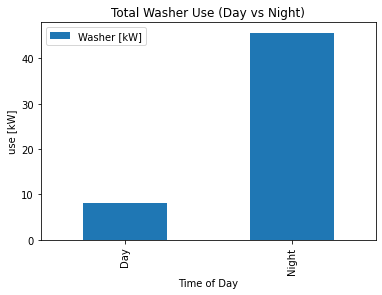

In [21]:
# Utilizing a simple bar graph, we can plot the differences in energy usage between day and night.
energy2.plot.bar( y ="Washer [kW]", ylabel= "use [kW]", title = 'Total Washer Use (Day vs Night)')

As shown in the bar graph above, the washer uses significantly more energy at night as opposed to day. This can be attributed to people working jobs and being out the house in the day time, then coming home and utilizing the washer at night. 

<AxesSubplot:title={'center':'Total Fridge Use (Day vs Night)'}, xlabel='Time of Day', ylabel='use [kW]'>

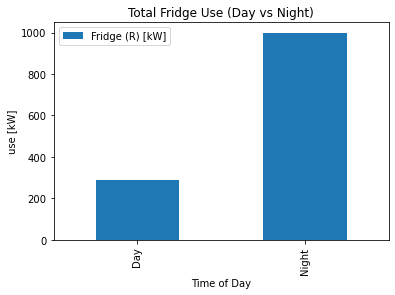

In [22]:
# Utilizing a simple bar graph, we can plot the differences in energy usage between day and night.
energy2.plot.bar( y ="Fridge (R) [kW]", ylabel = "use [kW]", title = "Total Fridge Use (Day vs Night)")

Similarly to the energy usage of the Washer, the fridge uses much more energy at night as people are more likely to be at home at nighttime. Opening and closing the fridge frequently will increase energy usage, and this occurs more often at nightime. 